# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

#Creating data to view and fit

In [49]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)


In [4]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to undestand righ now.. let's visualize it!

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


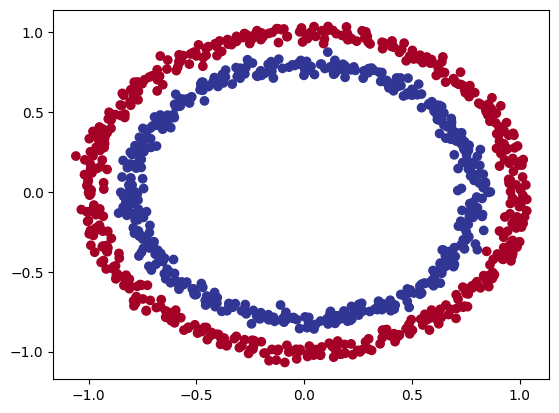

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

##Input and output shapes

In [8]:
# Check the shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [48]:
# View the first example of features and labels
X[0], y[0]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.75424623, 0.23148073], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [11]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [12]:
import tensorflow as tf
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1000, 800, 200)

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics="accuracy")

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 3.2707 - accuracy: 0.4640
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7747 - accuracy: 0.4930
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7158 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4930


In [15]:
# Let's try and improve our mocel by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around -50%.. its performing as if
So let's step things up a notch and add a extra layer.

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [17]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4440


[0.6933379173278809, 0.4440000057220459]

## Imrpoving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [18]:
# Set the random seed
tf.random.set_seed(42)
# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  # Add 100 dense neurons
    tf.keras.layers.Dense(10),   # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [19]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5090


[0.6949387788772583, 0.5090000033378601]

from numpy.lib.function_base import meshgrid
To Visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique call falls)

In [20]:
import numpy as np

In [52]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we.ve going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multuclass classification")

    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha= 0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [46]:
X, y

(<tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
 array([[ 0.75424623,  0.23148073],
        [-0.7561589 ,  0.15325888],
        [-0.81539196,  0.17328203],
        ...,
        [-0.13690037, -0.8100118 ],
        [ 0.6703616 , -0.76750153],
        [ 0.28105664,  0.96382445]], dtype=float32)>,
 <tf.Tensor: shape=(1000,), dtype=float32, numpy=
 array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
        1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1.,

In [53]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

ValueError: ignored

In [54]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [55]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)  # y =X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit out model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 6ms/step - loss: 38.6720 - mae: 38.6720
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 38.8117 - mae: 38.8117
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 38.6461 - mae: 38.6461
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5686 - mae: 38.5686
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 38.6609 - mae: 38.6609
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 38.8294 - mae: 38.8294
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 38.9148 - mae: 38.9148
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 38.3767 - mae: 38.3767
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 38.6722 - mae: 38.6722
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 38.7140 - mae: 38.7140
Epoch 11/100
5/5 [==============================] - 0s 3ms/

Oh wait... we compiled our model for a binary classification problem.

But.. we're now working on a regression problem, let's change the model to suit our data.

In [26]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile th emodel, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 432.3165 - mae: 432.3165
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 329.3366 - mae: 329.3366
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 230.2654 - mae: 230.2654
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 127.5527 - mae: 127.5527
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 49.0565 - mae: 49.0565
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 79.4483 - mae: 79.4483
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 75.2041 - mae: 75.2041
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 48.4170 - mae: 48.4170
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 48.1668 - mae: 48.1668
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 46.4110 - mae: 46.4110
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


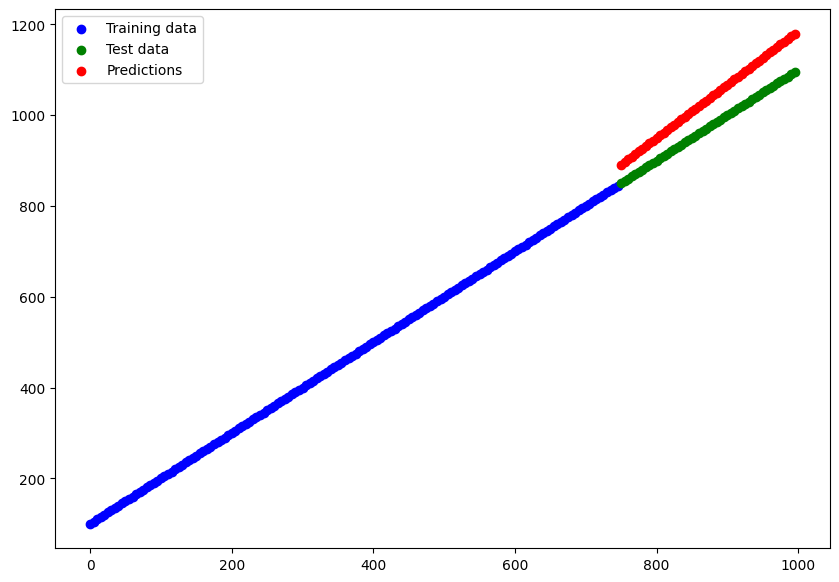

In [27]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

### The missing piece: Non-linearity

In [28]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9117 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8427 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8290 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8241 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8221 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8200 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8105 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8143 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8068 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7793 - accuracy: 0.4750
Epoch 11/

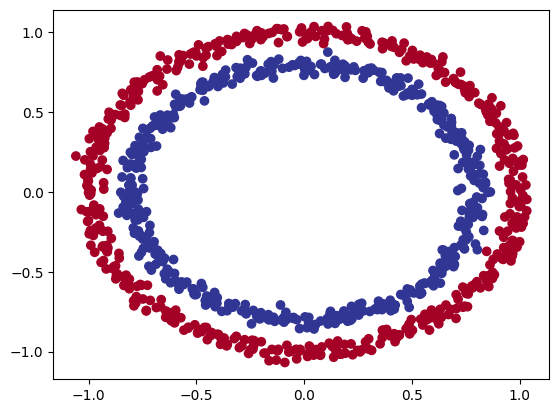

In [29]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


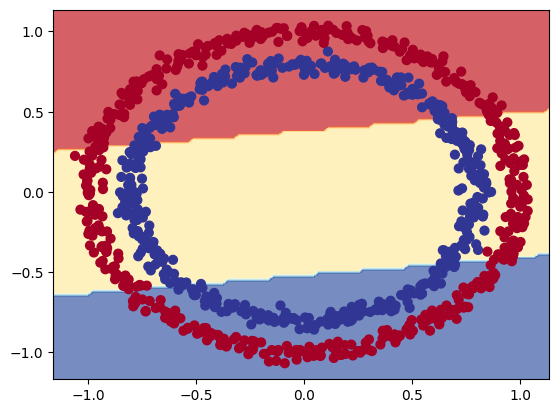

In [56]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics="accuracy")

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8104 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7971 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7870 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7768 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7666 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7413 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7408 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7382 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7371 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7360 - accuracy: 0.4850
Epoch 11/

In [33]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 2s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [34]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classification


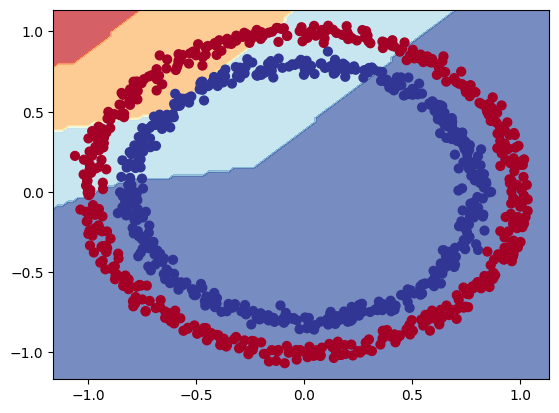

In [57]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [58]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6979 - accuracy: 0.5410
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5370
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5290
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5610
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5900
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6420
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6890
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6010
Epoch 11/

In [59]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.1809 - accuracy: 0.9900


[0.18091732263565063, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification


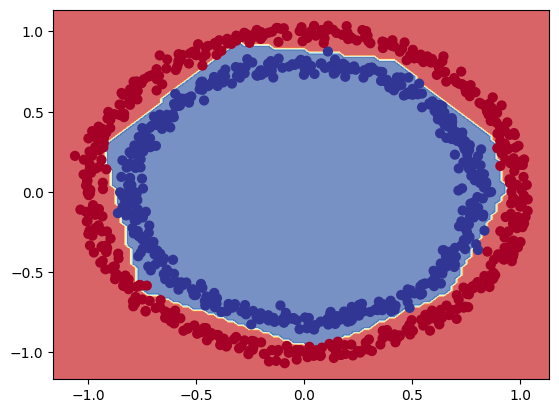

In [60]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.


In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
